<a href="https://colab.research.google.com/github/mar-ale-fer/dio-ml-bootcamp/blob/main/Metrics_for_performance_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from tensorflow.keras import datasets, layers, models

In [45]:
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [46]:
tf.__version__

'2.17.1'

In [47]:
#not used -->%load_ext tensorboard

In [48]:
logdir='log'

In [49]:
(train_images,train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [50]:
train_images = train_images.reshape((60000,28,28,1))
test_images= test_images.reshape((10000,28,28,1))
train_images, test_images = train_images / 255.0, test_images / 255.0
classes=[0,1,2,3,4,5,6,7,8,9]

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(4, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(8,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(8,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
#not used -->tensorboard_call = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=3,
          validation_data=(test_images, test_labels))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.6295 - loss: 1.0402 - val_accuracy: 0.9374 - val_loss: 0.2027
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9400 - loss: 0.2023 - val_accuracy: 0.9580 - val_loss: 0.1342
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9542 - loss: 0.1479 - val_accuracy: 0.9629 - val_loss: 0.1177


In [54]:
y_true=test_labels
#y_pred=model.predict_classes(test_images)
y_pred=np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [55]:
classes=[0,1,2,3,4,5,6,7,8,9]

In [68]:
# Calculate the confusion matrix using TensorFlow
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
# Normalize to values betwen 0 and 1 each cell of the confusion matrix
#con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:,np.newaxis],decimals=2)
# Accomodate in a table-like data structure
con_mat_df=pd.DataFrame(con_mat,
                        index=classes,
                        columns=classes)

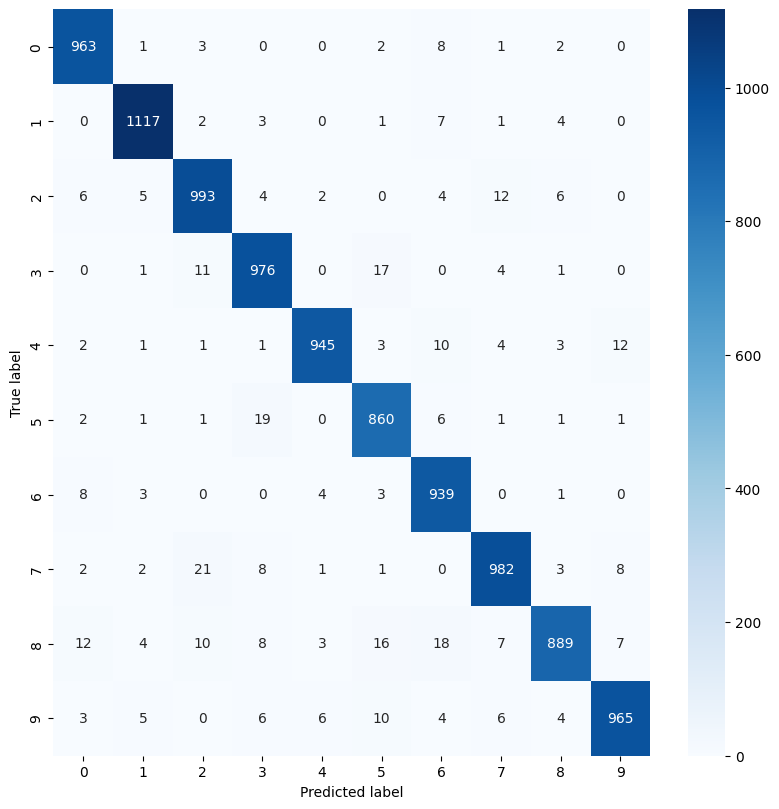

In [72]:
# Set the dimension of the figure
figure = plt.figure(figsize=(8,8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [67]:
# Initialize arrays to store per-class metrics
num_classes = 10
sensitivity = np.zeros(num_classes)
specificity = np.zeros(num_classes)
f1_score = np.zeros(num_classes)

# Calculate metrics for each class
for i in range(num_classes):
    TP = con_mat[i][i]  # True Positives: Correct predictions of class i
    FP = np.sum(con_mat[:, i]) - TP  # False Positives: Incorrect predictions of class i when actual class was different

    # Improved TN calculation: Sum of TPs for other classes
    TN = np.sum(np.diag(con_mat)) - con_mat[i, i]
    # np.diag(con_mat) gets all TPs (diagonal elements)
    # con_mat[i, i] is TP for current class i, which we exclude

    FN = np.sum(con_mat[i, :]) - TP  # False Negatives: Incorrect predictions of other classes when actual class was i


    # Calculate metrics, handling potential division by zero
    sensitivity[i] = TP / (TP + FN) if (TP + FN) != 0 else 0  # Sensitivity/Recall/TPR
    specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0  # Specificity/TNR
    f1_score[i] = 2 * TP / (2 * TP + FP + FN) if (2 * TP + FP + FN) != 0 else 0  # F1-score

# Calculate overall accuracy
overall_accuracy = np.trace(con_mat) / np.sum(con_mat)  # Trace(con_mat) is sum of diagonal elements

print(f"\nOverall Accuracy: {overall_accuracy:.4f}")


Overall Accuracy: 0.9629


In [64]:
# A tabular representation

data = {
    'Sensitivity': sensitivity,
    'Specificity': specificity,
    'F1-score': f1_score
}

# Create a Pandas DataFrame
df = pd.DataFrame(data, index=classes)  # 'classes' is your list of class labels (0-9)

# Display the DataFrame
print(df)

   Sensitivity  Specificity  F1-score
0     0.982653     0.995977  0.973711
1     0.984141     0.997305  0.981978
2     0.962209     0.994358  0.957570
3     0.966337     0.994369  0.959214
4     0.962322     0.998161  0.972723
5     0.964126     0.993992  0.952909
6     0.980167     0.993483  0.961105
7     0.955253     0.995854  0.959922
8     0.912731     0.997148  0.941737
9     0.956392     0.996779  0.964036


Classes ordered based on their performance

In [66]:
# Sort the DataFrame by F1-score in ascending order
df_sorted = df.sort_values(by=['F1-score'], ascending=True)

# Select the top 3 rows (least accurate classes)
#least_accurate_classes = df_sorted.head(3)

# Display the filtered DataFrame
print(df_sorted)

   Sensitivity  Specificity  F1-score
8     0.912731     0.997148  0.941737
5     0.964126     0.993992  0.952909
2     0.962209     0.994358  0.957570
3     0.966337     0.994369  0.959214
7     0.955253     0.995854  0.959922
6     0.980167     0.993483  0.961105
9     0.956392     0.996779  0.964036
4     0.962322     0.998161  0.972723
0     0.982653     0.995977  0.973711
1     0.984141     0.997305  0.981978
